In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [2]:
sales = pd.read_csv('sales_master.csv', parse_dates=['date'])
articles = pd.read_csv('product_table.csv')

In [3]:
sales.head()

,date,variant,purchases,net_amount,gross_amount
0,2017-10-02,494340001004,1.0,19.282061,19.99
1,2017-10-02,236505002074,2.0,15.411960,15.98
2,2017-10-02,236505002092,1.0,7.603579,7.99
3,2017-10-02,434045002034,1.0,34.678851,34.99
4,2017-10-02,434045002036,4.0,132.961475,139.96


In [4]:
articles.head()

,PRODUCT_CODE,PRODUCT_TYPE_NAME,DEPARTMENT_ID,DEPARTMENT_NAME,INDEX_GROUP_NAME,SECTION_NAME,article
0,526432,Pillow case,504,Sheets and pillowcases,Home,Sleep,526432001
1,381038,Bed skirt,508,Bedspreads/bedskirts,Home,Sleep,381038009
2,418545,T-shirt,176,Basics,Menswear,Men Underwear,418545028
3,467302,Storage,521,Textile kids,Home,Kids,467302028
4,452516,Socks,137,Socks,Ladieswear,"Women Nightwear, Socks & Tight",452516001


In [5]:
sales['week'] = sales['date'].dt.week

In [6]:
sales.describe().T

/Users/adonismaomao/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,count,mean,std,min,25%,50%,75%,max
variant,46694.0,4.630616e+11,8.020259e+10,1.077130e+11,4.380700e+11,4.813050e+11,5.157300e+11,5.980310e+11
purchases,46694.0,9.659871e+00,2.655433e+01,0.000000e+00,1.000000e+00,3.000000e+00,9.000000e+00,1.535000e+03
net_amount,46072.0,1.076032e+02,2.764828e+02,0.000000e+00,NaN,NaN,NaN,2.045746e+04
gross_amount,46072.0,1.802883e+02,4.558773e+02,0.000000e+00,NaN,NaN,NaN,3.068465e+04
week,46694.0,4.110258e+01,7.867065e-01,4.000000e+01,4.000000e+01,4.100000e+01,4.200000e+01,4.200000e+01


In [7]:
sales['variant'] = sales['variant'].astype(str)

In [8]:
sales['product'] = sales['variant'].apply(lambda x: x[0:6])
sales['article'] = sales['variant'].apply(lambda x: x[0:9])

In [9]:
sales.head()

,date,variant,purchases,net_amount,gross_amount,week,product,article
0,2017-10-02,494340001004,1.0,19.282061,19.99,40,494340,494340001
1,2017-10-02,236505002074,2.0,15.411960,15.98,40,236505,236505002
2,2017-10-02,236505002092,1.0,7.603579,7.99,40,236505,236505002
3,2017-10-02,434045002034,1.0,34.678851,34.99,40,434045,434045002
4,2017-10-02,434045002036,4.0,132.961475,139.96,40,434045,434045002


In [10]:
products = sales.groupby(['product', 'week']).sum()

In [11]:
products.head()

purchases  net_amount  gross_amount
product week                                     
107713  40          1.0   19.931457         19.99
        41          7.0   48.933521        139.93
        42          3.0   14.974509         59.97
117369  40        106.0  593.514644        634.94
        41        105.0  569.765805        628.95

In [12]:
products['price'] = products['net_amount']/products['purchases']
products['markdown'] = 1 - products['net_amount']/products['gross_amount']


In [13]:
products.head()

purchases  net_amount  gross_amount      price  markdown
product week                                                          
107713  40          1.0   19.931457         19.99  19.931457  0.002929
        41          7.0   48.933521        139.93   6.990503  0.650300
        42          3.0   14.974509         59.97   4.991503  0.750300
117369  40        106.0  593.514644        634.94   5.599195  0.065243
        41        105.0  569.765805        628.95   5.426341  0.094100

In [14]:
products.reset_index(level=[0, 1], inplace=True)

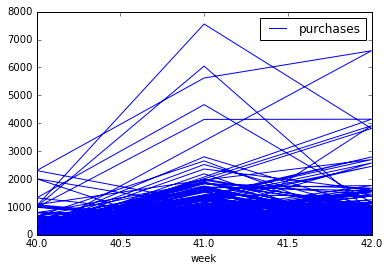

In [15]:
products.plot('week', 'purchases')

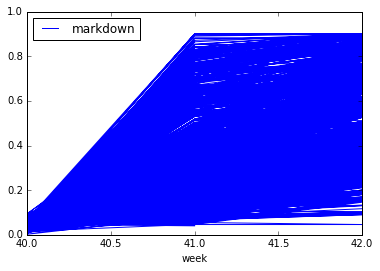

In [16]:
products.plot('week', 'markdown')

In [17]:
prod_week = pd.pivot_table(products, values=['purchases', 'price', 'markdown'], 
               index = ['product'], columns=['week'], aggfunc=np.sum)

In [18]:
prod_week.head()

purchases                    price                      markdown  \
week           40     41     42         40        41        42        40   
product                                                                    
107713        1.0    7.0    3.0  19.931457  6.990503  4.991503  0.002929   
117369      106.0  105.0   81.0   5.599195  5.426341  4.827341  0.065243   
141645        4.0   31.0   19.0   7.767762  4.411279  3.612279  0.027815   
153175       81.0  656.0  358.0  38.207687  9.825543  3.999000  0.044569   
179393        3.0   13.0    7.0   4.896394  3.639207  3.140207  0.018759   

                         
week         41      42  
product                  
107713   0.6503  0.7503  
117369   0.0941  0.1941  
141645   0.4479  0.5479  
153175   0.7543  0.9000  
179393   0.2707  0.3707

In [19]:
prod_week['uplift_week41'] = prod_week['purchases'][41]/prod_week['purchases'][40]
prod_week['uplift_week42'] = prod_week['purchases'][42]/prod_week['purchases'][40]

In [20]:
prod_week.head()

purchases                    price                      markdown  \
week           40     41     42         40        41        42        40   
product                                                                    
107713        1.0    7.0    3.0  19.931457  6.990503  4.991503  0.002929   
117369      106.0  105.0   81.0   5.599195  5.426341  4.827341  0.065243   
141645        4.0   31.0   19.0   7.767762  4.411279  3.612279  0.027815   
153175       81.0  656.0  358.0  38.207687  9.825543  3.999000  0.044569   
179393        3.0   13.0    7.0   4.896394  3.639207  3.140207  0.018759   

                        uplift_week41 uplift_week42  
week         41      42                              
product                                              
107713   0.6503  0.7503      7.000000      3.000000  
117369   0.0941  0.1941      0.990566      0.764151  
141645   0.4479  0.5479      7.750000      4.750000  
153175   0.7543  0.9000      8.098765      4.419753  
179393   0.2707  0.3707      4.333333      2.333333

In [21]:
prod_week.describe()

purchases                                 price              \
week            40           41           42          40          41   
count   681.000000   681.000000   681.000000  681.000000  640.000000   
mean     96.143906   340.929515   225.273128   19.023922   11.890668   
std     182.324565   644.308670   488.161610   14.846951   12.222364   
min       1.000000     0.000000     0.000000    0.932065    0.000000   
25%      12.000000    34.000000    13.000000    9.475672         NaN   
50%      39.000000   123.000000    74.000000   14.357908         NaN   
75%     107.000000   356.000000   217.000000   23.816193         NaN   
max    2302.000000  7555.000000  6597.000000  142.044125  119.200000   

                     markdown                         uplift_week41  \
week           42          40          41          42                 
count  583.000000  681.000000  639.000000  583.000000    681.000000   
mean     9.519856    0.049708    0.404219    0.510093      4.555753   
std      9.465496    0.012482    0.239935    0.237793      3.648139   
min      0.299000    0.002486    0.040200    0.046000      0.000000   
25%           NaN    0.043431         NaN         NaN      1.820965   
50%           NaN    0.049729         NaN         NaN      3.636364   
75%           NaN    0.055983         NaN         NaN      6.913043   
max     81.908898    0.095313    0.900000    0.900000     21.093023   

      uplift_week42  
week                 
count    681.000000  
mean       2.512551  
std        1.839036  
min        0.000000  
25%        1.095652  
50%        2.333333  
75%        3.730769  
max       10.000000

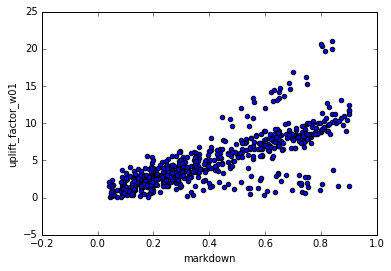

In [22]:
#Uplift_week41 vs. markdown (elasticity)
plt.scatter(prod_week['markdown'][41], prod_week['uplift_week41'])
plt.ylabel('uplift_factor_w01')
plt.xlabel('markdown')
plt.show()

Looks quite linear or exponential.

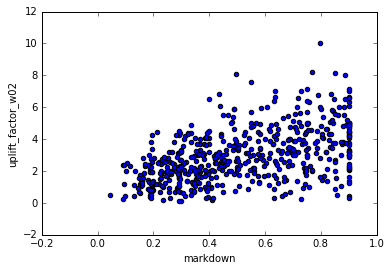

In [23]:
#Uplift_week42 vs. markdown
plt.scatter(prod_week['markdown'][42], prod_week['uplift_week42'])
plt.ylabel('uplift_factor_w02')
plt.xlabel('markdown')
plt.show()

In [24]:
prod_week['sold_tot'] = prod_week['purchases'][40]+prod_week['purchases'][41]+prod_week['purchases'][42]

In [25]:
prod_week.head()

purchases                    price                      markdown  \
week           40     41     42         40        41        42        40   
product                                                                    
107713        1.0    7.0    3.0  19.931457  6.990503  4.991503  0.002929   
117369      106.0  105.0   81.0   5.599195  5.426341  4.827341  0.065243   
141645        4.0   31.0   19.0   7.767762  4.411279  3.612279  0.027815   
153175       81.0  656.0  358.0  38.207687  9.825543  3.999000  0.044569   
179393        3.0   13.0    7.0   4.896394  3.639207  3.140207  0.018759   

                        uplift_week41 uplift_week42 sold_tot  
week         41      42                                       
product                                                       
107713   0.6503  0.7503      7.000000      3.000000     11.0  
117369   0.0941  0.1941      0.990566      0.764151    292.0  
141645   0.4479  0.5479      7.750000      4.750000     54.0  
153175   0.7543  0.9000      8.098765      4.419753   1095.0  
179393   0.2707  0.3707      4.333333      2.333333     23.0

In [26]:
prod_week['sold_w40'] = prod_week['purchases'][40]/prod_week['sold_tot']
prod_week['sold_w41'] = (prod_week['purchases'][40] + prod_week['purchases'][41])/prod_week['sold_tot']
prod_week['sold_w42'] = 1

In [27]:
prod_week.head()

purchases                    price                      markdown  \
week           40     41     42         40        41        42        40   
product                                                                    
107713        1.0    7.0    3.0  19.931457  6.990503  4.991503  0.002929   
117369      106.0  105.0   81.0   5.599195  5.426341  4.827341  0.065243   
141645        4.0   31.0   19.0   7.767762  4.411279  3.612279  0.027815   
153175       81.0  656.0  358.0  38.207687  9.825543  3.999000  0.044569   
179393        3.0   13.0    7.0   4.896394  3.639207  3.140207  0.018759   

                        uplift_week41 uplift_week42 sold_tot  sold_w40  \
week         41      42                                                  
product                                                                  
107713   0.6503  0.7503      7.000000      3.000000     11.0  0.090909   
117369   0.0941  0.1941      0.990566      0.764151    292.0  0.363014   
141645   0.4479  0.5479      7.750000      4.750000     54.0  0.074074   
153175   0.7543  0.9000      8.098765      4.419753   1095.0  0.073973   
179393   0.2707  0.3707      4.333333      2.333333     23.0  0.130435   

         sold_w41 sold_w42  
week                        
product                     
107713   0.727273        1  
117369   0.722603        1  
141645   0.648148        1  
153175   0.673059        1  
179393   0.695652        1

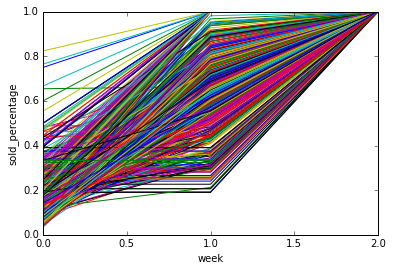

In [28]:
plt.plot([prod_week['sold_w40'], prod_week['sold_w41'], prod_week['sold_w42']])
plt.ylabel('sold_percentage')
plt.xlabel('week')
plt.show()

## Predict uplift factor of week1

In [29]:
articles.head()

,PRODUCT_CODE,PRODUCT_TYPE_NAME,DEPARTMENT_ID,DEPARTMENT_NAME,INDEX_GROUP_NAME,SECTION_NAME,article
0,526432,Pillow case,504,Sheets and pillowcases,Home,Sleep,526432001
1,381038,Bed skirt,508,Bedspreads/bedskirts,Home,Sleep,381038009
2,418545,T-shirt,176,Basics,Menswear,Men Underwear,418545028
3,467302,Storage,521,Textile kids,Home,Kids,467302028
4,452516,Socks,137,Socks,Ladieswear,"Women Nightwear, Socks & Tight",452516001


In [30]:
product_types = articles.drop(['article', 'DEPARTMENT_ID'], axis=1).drop_duplicates()
product_types['PRODUCT_CODE'] = product_types['PRODUCT_CODE'].astype(str)
product_types = product_types.set_index('PRODUCT_CODE')

In [31]:
product_types.head()

,PRODUCT_TYPE_NAME,DEPARTMENT_NAME,INDEX_GROUP_NAME,SECTION_NAME
PRODUCT_CODE,,,,
526432,Pillow case,Sheets and pillowcases,Home,Sleep
381038,Bed skirt,Bedspreads/bedskirts,Home,Sleep
418545,T-shirt,Basics,Menswear,Men Underwear
467302,Storage,Textile kids,Home,Kids
452516,Socks,Socks,Ladieswear,"Women Nightwear, Socks & Tight"


In [32]:
product_all = product_types.join(prod_week, how='right')

/Users/adonismaomao/anaconda/lib/python2.7/site-packages/pandas/tools/merge.py:205: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [33]:
product_all['markdown', 41] = product_all['markdown', 41].fillna(0)

In [34]:
features = ['PRODUCT_TYPE_NAME', 'DEPARTMENT_NAME', 'INDEX_GROUP_NAME', 'SECTION_NAME']
num_fea = [('purchases', 40), ('price', 40), ('markdown', 41)]

In [35]:
X_cat = pd.get_dummies(product_all[features], prefix='is_')
X = pd.concat([X_cat, product_all[num_fea]], axis=1)

In [36]:
X.head()

,is__Bag,is__Ballerina,is__Bed linen,is__Bed skirt,is__Bed spread,is__Belt,is__Bikini,is__Blazer,is__Blouse,is__Body,...,is__Sleep,is__Storages,is__Women Lingerie,"is__Women Nightwear, Socks & Tight","is__Women Swimwear, Functional & M",is__Young Boy,is__Young Girl,"(purchases, 40)","(price, 40)","(markdown, 41)"
product,,,,,,,,,,,,,,,,,,,,,
107713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.931457,0.6503
117369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,5.599195,0.0941
141645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.767762,0.4479
153175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,38.207687,0.7543
179393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.896394,0.2707


In [37]:
y = product_all['uplift_week41','']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Training length: " +str(len(y_train)))
print("Test length: " +str(len(y_test)))

Training length: 544
Test length: 137


In [39]:
regr = RandomForestRegressor(n_estimators=200, min_samples_leaf=10, random_state=0)

In [40]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [41]:
regr.score(X_train, y_train), regr.score(X_test, y_test)

(0.84519523053964629, 0.87187174695648817)

In [42]:
y_hat = regr.predict(X)

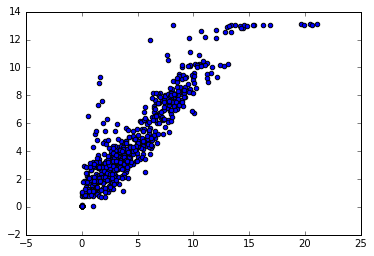

In [43]:
plt.scatter(y, y_hat)

In [44]:
X_names = X_cat.columns.tolist()
X_names.extend(['popularity','price', 'markdown'])

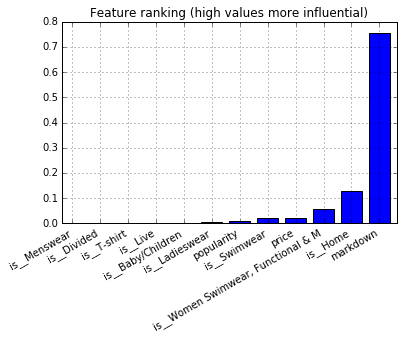

In [45]:
imp = regr.feature_importances_
sortNames = [y for (x,y) in sorted(zip(imp,X_names)) if x >0]
sortImp = [x for (x,y) in sorted(zip(imp,X_names)) if x >0]

fig = plt.figure()
ind = np.arange(len(sortImp))
width = .75
plt.bar(ind, sortImp, width=width)
plt.xticks(ind + width / 2, sortNames)
fig.autofmt_xdate()
plt.grid(True)
plt.title('Feature ranking (high values more influential)')
plt.show()


## Planning for Oct 2018

One goal is to get the maximum profit possible in the sale season to balance between markdown and quantity sold.

For each product:
### Profit = purchases_w40 x uplift_factor x price_w40 x (1 - markdown) - purchases_w40 x price_w40

We can maximize profit for each product/article assuming they are independant from each other.

In [46]:
#Assuming each product is independant 
def get_profit(products):
    plan = {'product':[], 'profit':[], 'markdown':[], 'uplift':[]}
    for index, item in products.iterrows():
        item = pd.DataFrame(item).T
        profit = []
        for markdown in range(0, 100, 10):
            item[('markdown', 41)] = markdown*0.01
            uplift = regr.predict(item)
            p = item['purchases', 40]*uplift*item['price', 40]*(1-markdown*0.01)-item['purchases', 40]*item['price', 40]
            p = p.values
            profit.append([index, p, markdown, uplift])            
        max_profit = max(profit, key=lambda x: x[1])
        plan['product'].append(max_profit[0])
        plan['profit'].append(max_profit[1][0])
        plan['markdown'].append(max_profit[2])
        plan['uplift'].append(max_profit[3][0])
        
    plan = pd.DataFrame(plan)
    return plan
              

In [47]:
#Drop the original markdown 
new_products = X.drop(('markdown', 41), axis=1)

%time
plan = get_profit(new_products)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


In [48]:
plan.describe()

,markdown,profit,uplift
count,681.000000,681.000000,681.000000
mean,45.770925,3628.035007,6.459594
std,11.221058,7519.608240,2.703796
min,20.000000,9.524059,2.643505
25%,30.000000,330.085508,4.302212
50%,50.000000,1292.696793,5.939788
75%,50.000000,3799.698814,6.905111
max,60.000000,95668.273282,12.161967


If inventory data is available, the percentages of number of items in storage can be studied against time, and we can calculate the uplist factor from the inventory data and then derive the correct markdown by using the uplift factor-markdown model.

In addition, we can also add the cost calculation of the storage into consideration so the profit part will become:
### *profit = profit_sale - cost_storage*

And if we maximize it, it will have a impact on the quantity we should sell which will have an impact on the uplift factor.